In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = load_iris()

In [5]:
iris = pd.DataFrame(data.data,columns=data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
scaler = MinMaxScaler()

In [11]:
X=iris

In [13]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [19]:
# KMeans Clustering is an unsupervised machine learning algorithm used to group data into K clusters based on similarity.

# It is a centroid-based clustering method that minimizes the variance within each cluster.

# Choose K: The user specifies the number of clusters K.

# Initialize Centroids: Randomly select K points as the initial cluster centers.

# Assign Points to Clusters: Each data point is assigned to the nearest centroid using Euclidean distance (or another metric).

# Update Centroids: The centroids are recomputed as the mean of all points in their respective clusters.

# Repeat Steps 3 & 4 until: Centroids do not change significantly OR A maximum number of iterations is reached.

# Final Cluster Formation: The algorithm converges, and the final clusters are formed.

In [21]:
# KMeans clustering is a good choice for the Iris dataset due to the following reasons:

# Well-Separated Natural Groups
# Clear Cluster Centers 
# Scalability & Performance
# The results from KMeans can be visualized in 2D (e.g., using petal length & width), making it easier to analyze the clustering.

In [23]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [25]:
wcss

[41.16611042137329,
 12.127790750538193,
 7.12275017294385,
 5.525760232040968,
 4.9838184844462585,
 4.085506031334781,
 3.5256487658433455,
 3.1800855293632533,
 2.8187364955593,
 2.6200808658394354]

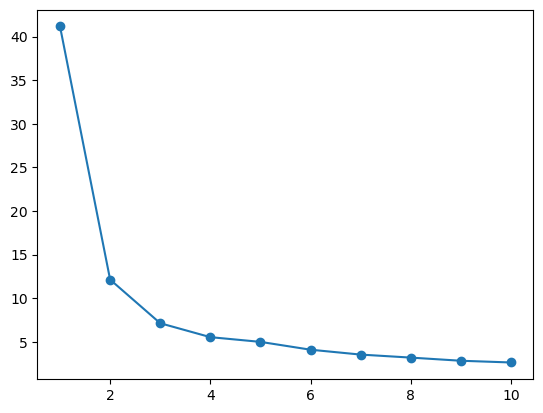

In [27]:
plt.plot(range(1,11),wcss,marker='o')

In [29]:
kmeans = KMeans(n_clusters=3,random_state=42)
y_pred = kmeans.fit_predict(X_scaled)
y_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [31]:
X['Clusters'] = y_pred

In [33]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


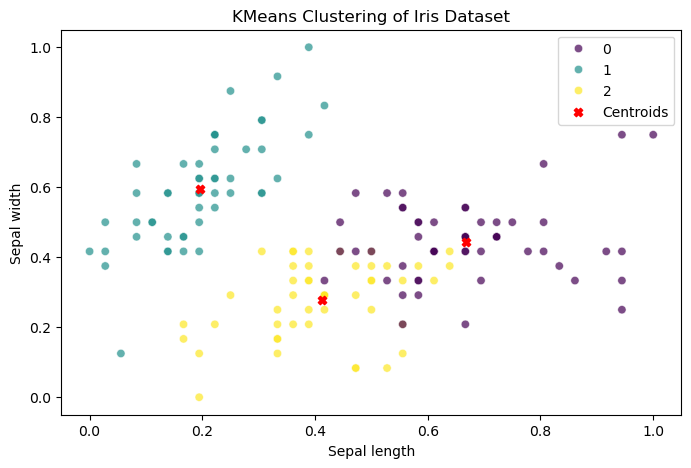

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_pred, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', label='Centroids')
plt.title("KMeans Clustering of Iris Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [41]:
# Hierarchical Clustering is an unsupervised machine learning algorithm that groups data points into a hierarchy of clusters.

# There are two main types:

# Agglomerative (Bottom-Up)
# Each data point starts as its own cluster.
# Iteratively, the two closest clusters are merged based on a distance metric.
# This continues until one single cluster remains or a predefined number of clusters is reached.

# Divisive (Top-Down)
# Starts with one large cluster.
# Splits clusters into smaller groups recursively until each point is its own cluster.

In [43]:
# Hierarchical clustering is a good choice for the Iris dataset due to the following reasons:

# Works Well for Small Datasets
# Dendrogram Provides Better Insights
# No Need to Predefine the Number of Clusters

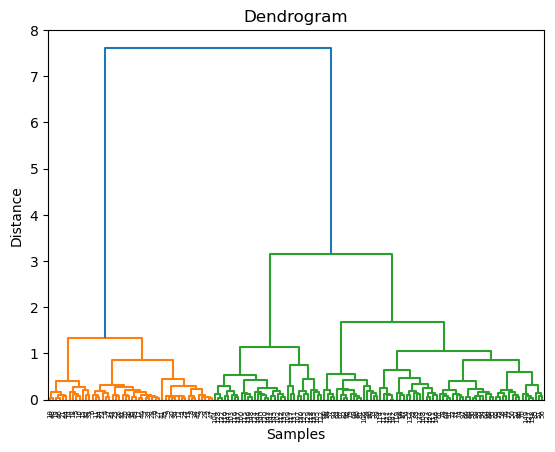

In [45]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [47]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [49]:
y_hc = hc.fit_predict(X_scaled)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

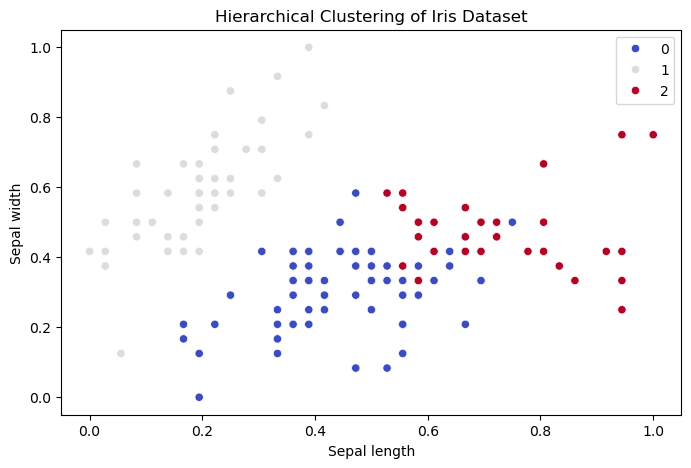

In [51]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y_hc, palette='coolwarm')
plt.title("Hierarchical Clustering of Iris Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()